In [5]:
!pip install h5py==2.8.0rc1

In [41]:
import numpy as np
import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, Flatten
from keras.layers import MaxPooling2D, Dropout

In [74]:
(pics, labels), (test_pics, test_labels) = cifar10.load_data()

In [22]:
pics.shape

(50000, 32, 32, 3)

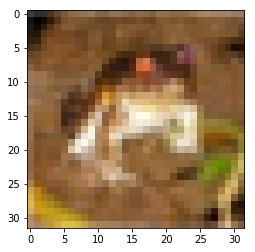

In [23]:
plt.imshow(pics[0])

In [26]:
test = np.array([1,2,3,4,5])
test_cpy = test
test = test.astype('float32')
test /= 3.4
print("test_cpy = ", test_cpy)
print("test = ", test)

test_cpy =  [1 2 3 4 5]
test =  [0.29411763 0.58823526 0.8823529  1.1764705  1.4705882 ]


In [27]:
pics = pics.astype('float32')

In [28]:
pics /= 255

In [29]:
pics.shape

(50000, 32, 32, 3)

In [30]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

In [31]:
labels = keras.utils.to_categorical(labels, len(class_names))

In [33]:
labels[0]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [39]:
def label_to_text(label):
    print(class_names[np.argmax(label)])

In [40]:
label_to_text(labels[0])

frog


In [43]:
# THIS TELLS KERAS WE WILL BE ADDING LAYERS IN ORDER
model = Sequential()

# OUR FIRST COLLECTION OF LAYERS
model.add( Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu' ))
model.add( Conv2D(32, (3,3), activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# SECOND LAYER, SAME AS FIRST EXCEPT FOR TWICE THE FEATURE MAPS
model.add( Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add( Conv2D(64, (3,3), activation='relu' ))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Dropout(0.25))

# NOW LET'S START FORCING THE MODEL TO CONVERGE ON 1 of !0 CLASS NAMES
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))

# OUR MODEL IS FINISHED. LET'S TELL KERAS TO COMPILE IT
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
training_pics = pics[:45000]

In [47]:
validation_pics = pics[45000:]

In [48]:
training_labels = labels[:45000]

In [49]:
validation_labels = labels[45000:]

In [50]:
batch_size = 128

In [52]:
def TrainingLoop(number_of_epochs):
    model.fit(training_pics, 
              training_labels, 
              batch_size=batch_size, 
              epochs=number_of_epochs, 
              verbose=1, 
              validation_split=.1, 
              validation_data=(validation_pics, validation_labels))

In [53]:
TrainingLoop(10)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 290s 6ms/step - loss: 1.6527 - acc: 0.3906 - val_loss: 1.3621 - val_acc: 0.5090
Epoch 2/10
45000/45000 [==============================] - 279s 6ms/step - loss: 1.2707 - acc: 0.5444 - val_loss: 1.1365 - val_acc: 0.6020
Epoch 3/10
45000/45000 [==============================] - 280s 6ms/step - loss: 1.1035 - acc: 0.6093 - val_loss: 0.9384 - val_acc: 0.6788
Epoch 4/10
45000/45000 [==============================] - 289s 6ms/step - loss: 0.9811 - acc: 0.6536 - val_loss: 0.8533 - val_acc: 0.7058
Epoch 5/10
45000/45000 [==============================] - 278s 6ms/step - loss: 0.8991 - acc: 0.6829 - val_loss: 0.8148 - val_acc: 0.7186
Epoch 6/10
45000/45000 [==============================] - 281s 6ms/step - loss: 0.8328 - acc: 0.7056 - val_loss: 0.7543 - val_acc: 0.7362
Epoch 7/10
45000/45000 [==============================] - 271s 6ms/step - loss: 0.7788 - acc: 0.7276 - val_loss: 0.6981 - v

In [55]:
test_image_batch = np.array([pics[22515]])
result = model.predict(test_image_batch, batch_size=1, verbose=1)
label_to_text(result)

1/1 [==============================] - 0s 8ms/step
deer


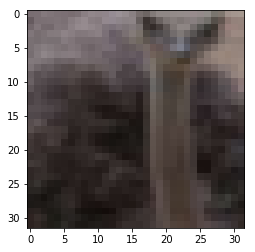

In [56]:
plt.imshow(pics[22515])

In [75]:
results = model.predict(test_pics, batch_size=128, verbose=0)

In [76]:
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [77]:
test_labels = keras.utils.to_categorical(test_labels, len(class_names))

In [78]:
test_labels.shape

(10000, 10)

In [79]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [81]:
results_test = []
for result in results:
    binary_array = [float(x == max(result)) for x in result]
    results_test.append(binary_array)

In [82]:
results_test

[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

In [113]:
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [114]:
results_test[0]

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [70]:
model.save_weights('tims_model.hd5')

In [83]:
differences = test_labels - results_test

In [84]:
differences

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [87]:
num_fails = sum(1 for label_categories in differences if 1 in label_categories)

In [88]:
num_corrects = sum(1 for label_categories in differences if 1 not in label_categories)

In [94]:
print(str(100 * num_corrects / (num_corrects + num_fails)) + "% accuracy on downloaded test data")

58.77% accuracy on downloaded test data


Example wrong one?

In [97]:
wrongs = [ i for i, val in enumerate(differences) if 1 in differences[i] ]

In [ ]:
plt.imshow(test_pics[wrongs[0]])

In [ ]:
label_to_text(test_labels[wrongs[0]])

In [ ]:
label_to_text(results_test[wrongs[0]])

In [118]:
len(wrongs)

4123

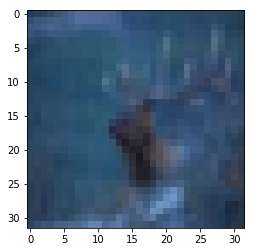

2
deer
airplane


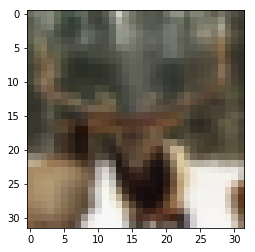

5
deer
airplane


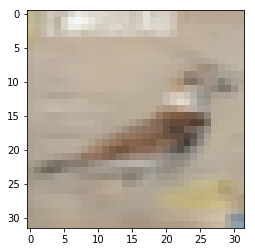

22
bird
airplane


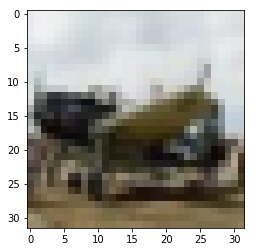

24
airplane
truck


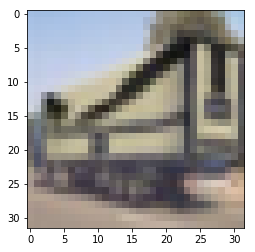

25
truck
airplane


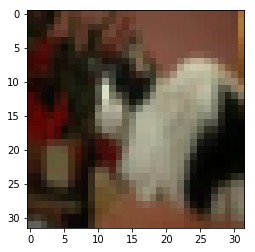

26
cat
horse


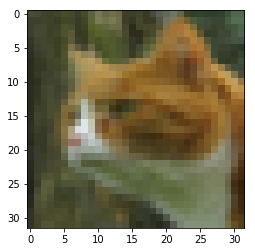

29
cat
automobile


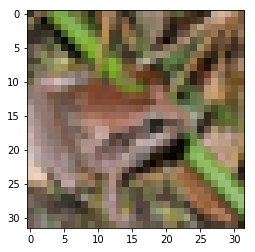

32
frog
bird


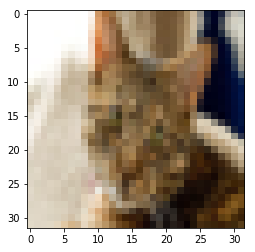

35
cat
truck


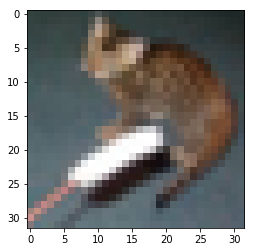

36
cat
ship


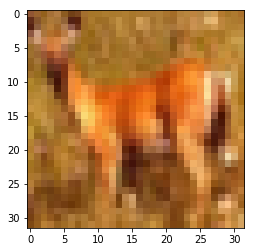

37
deer
airplane


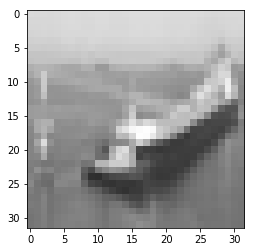

40
ship
airplane


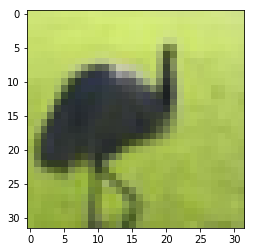

42
bird
airplane


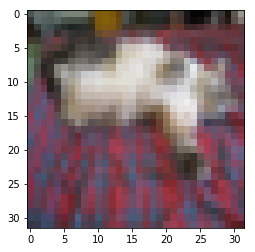

52
cat
dog


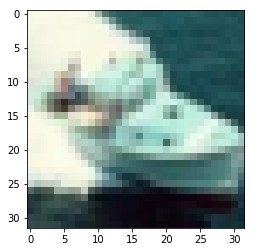

53
ship
truck


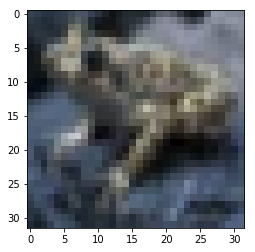

57
frog
truck


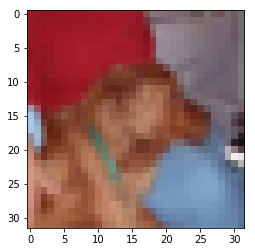

58
dog
cat


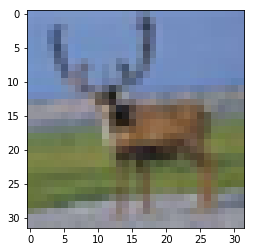

59
deer
airplane


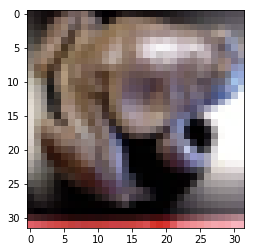

61
frog
automobile


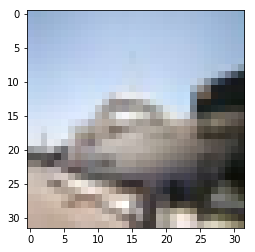

62
ship
automobile


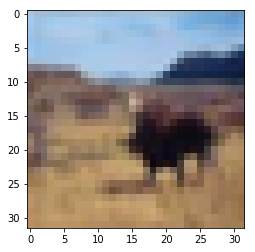

63
deer
horse


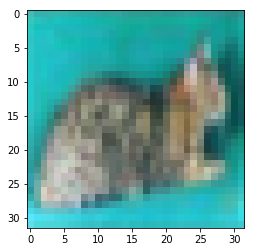

67
cat
airplane


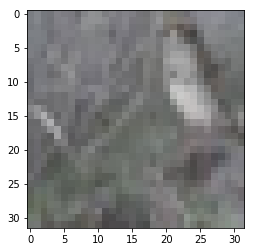

70
bird
ship


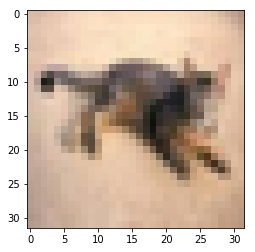

71
cat
airplane


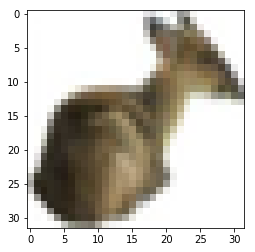

74
deer
cat


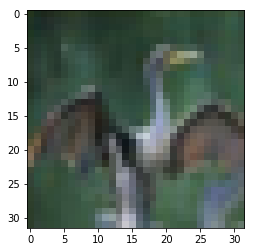

76
bird
airplane


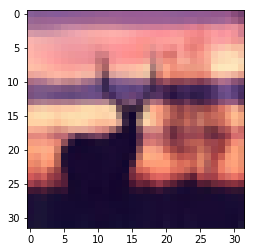

78
deer
truck


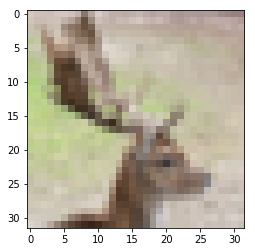

85
deer
airplane


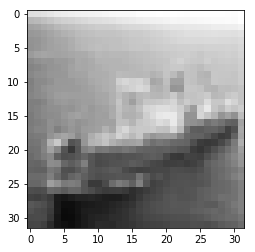

88
ship
truck


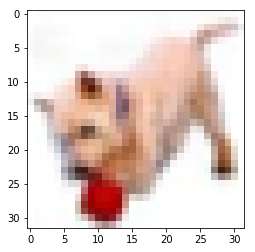

91
dog
cat


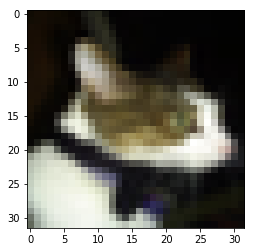

92
cat
automobile


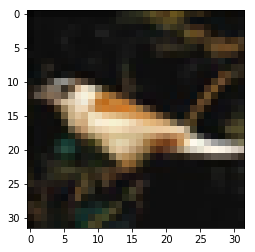

94
bird
airplane


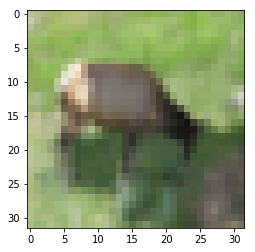

96
deer
bird


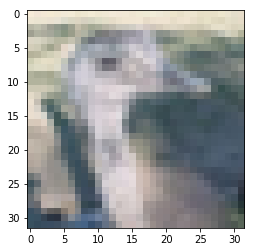

100
bird
ship


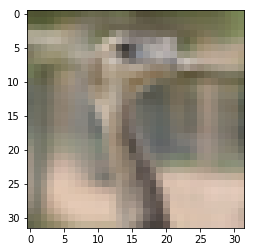

102
bird
horse


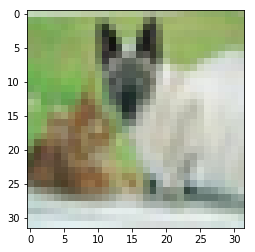

103
cat
horse


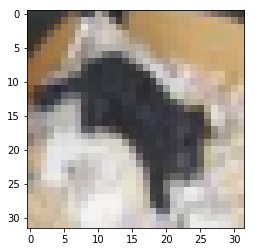

106
dog
bird


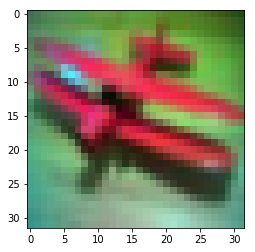

110
airplane
automobile


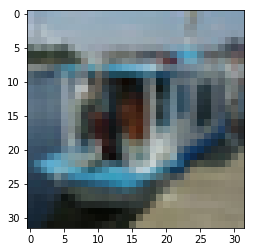

117
ship
truck


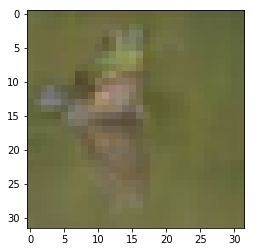

118
frog
bird


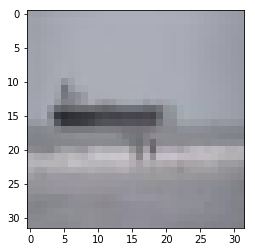

120
ship
airplane


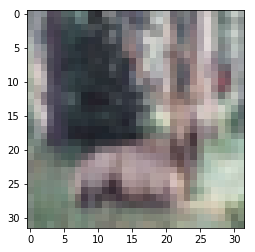

121
deer
airplane


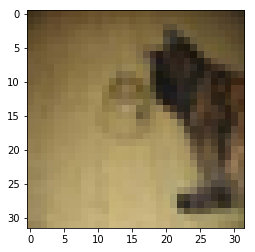

123
cat
dog


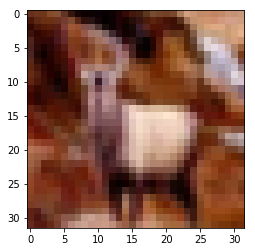

124
deer
horse


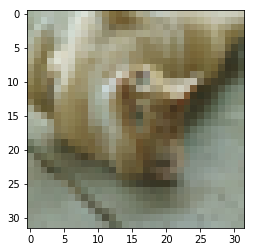

126
cat
ship


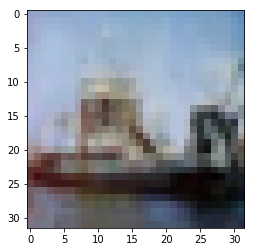

128
ship
truck


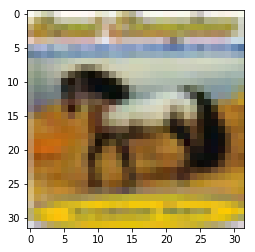

129
horse
airplane


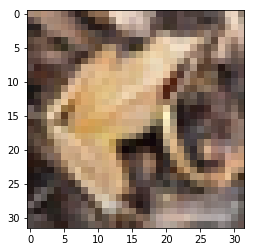

130
frog
horse


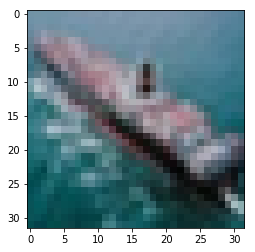

132
ship
airplane


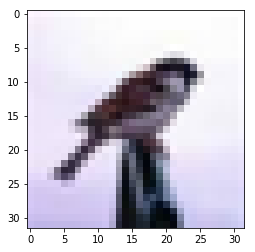

135
bird
airplane


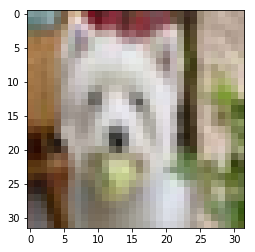

139
dog
horse


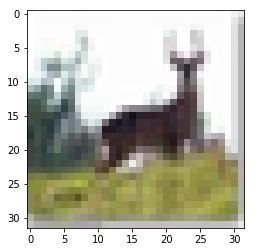

140
deer
airplane


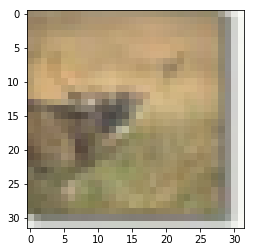

143
deer
ship


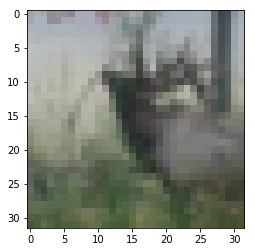

144
deer
horse


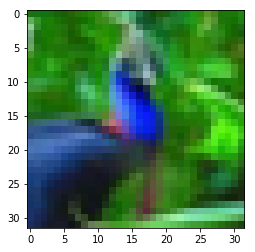

145
bird
automobile


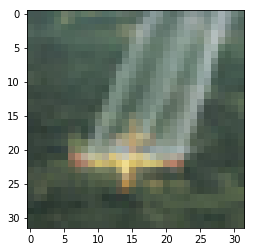

147
airplane
truck


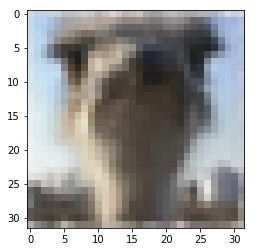

150
bird
horse


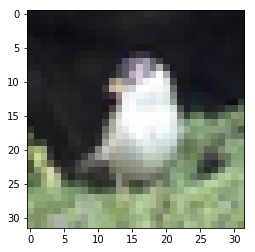

152
bird
horse


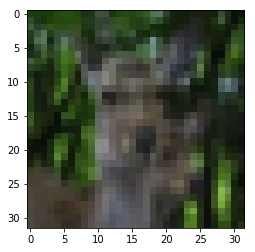

158
deer
ship


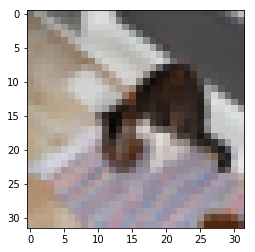

159
cat
airplane


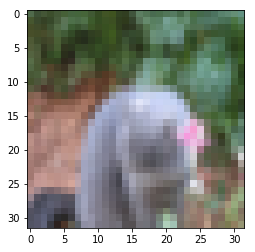

160
cat
dog


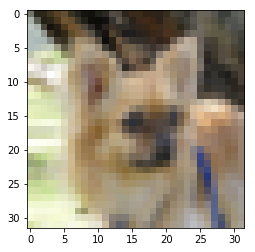

162
dog
horse


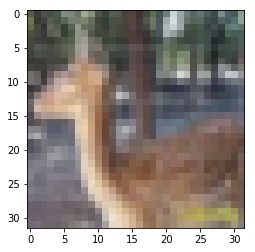

164
deer
ship


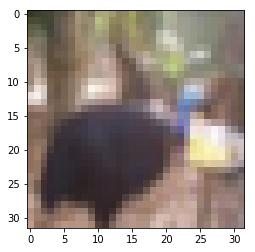

165
bird
cat


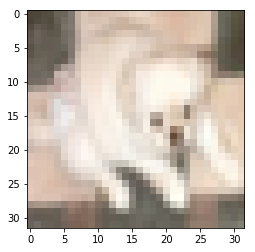

166
dog
ship


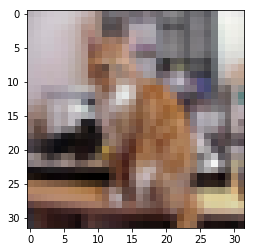

167
cat
truck


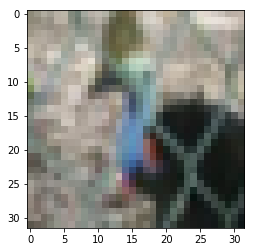

168
bird
truck


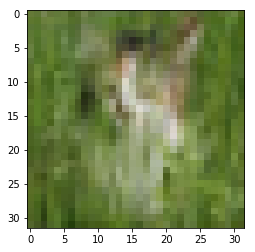

176
cat
frog


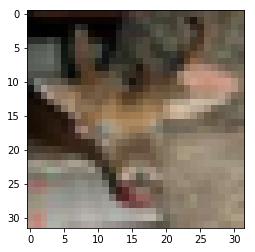

177
deer
cat


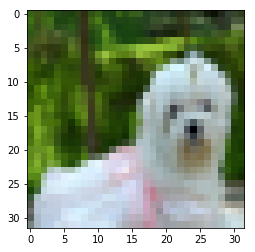

179
dog
bird


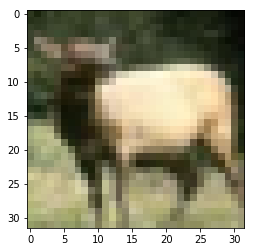

183
deer
horse


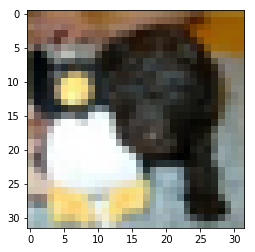

184
dog
horse


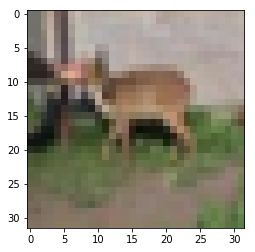

186
deer
airplane


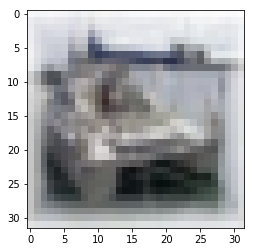

187
ship
truck


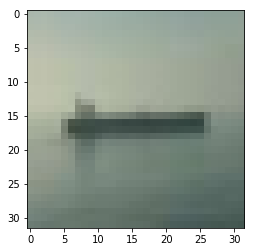

188
ship
airplane


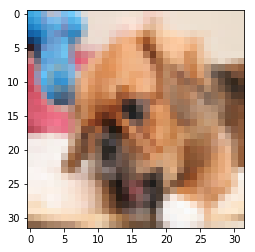

190
dog
truck


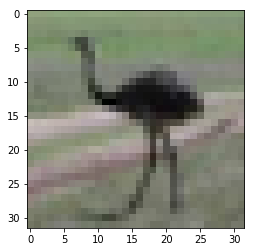

195
bird
airplane


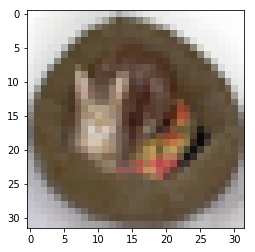

200
cat
frog


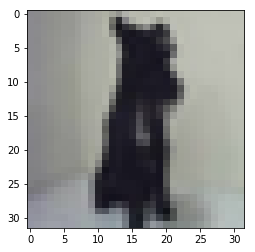

211
dog
horse


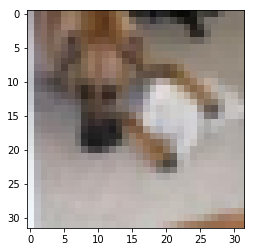

212
dog
cat


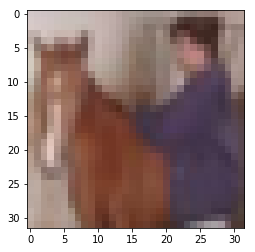

219
horse
automobile


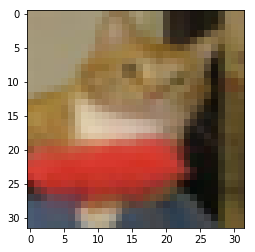

221
cat
automobile


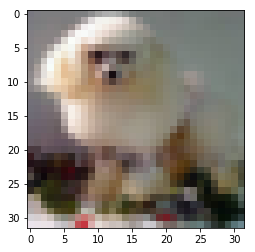

223
dog
truck


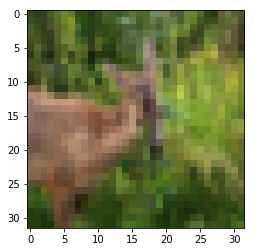

224
deer
truck


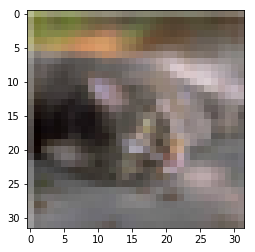

226
cat
horse


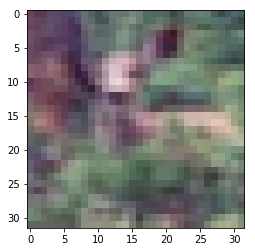

227
deer
airplane


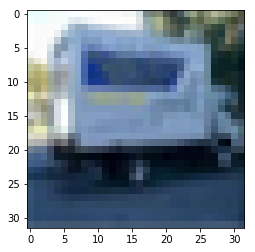

229
truck
automobile


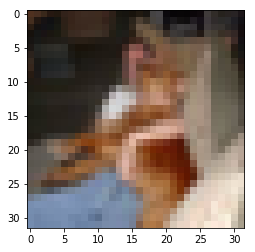

232
dog
bird


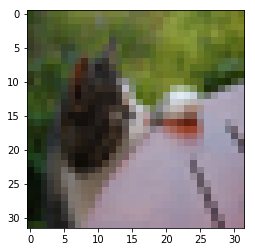

234
cat
horse


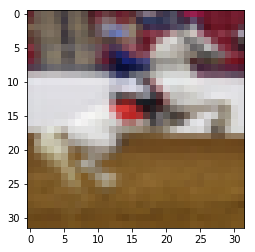

236
horse
automobile


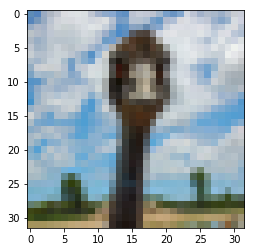

237
bird
truck


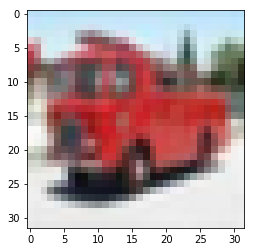

238
truck
automobile


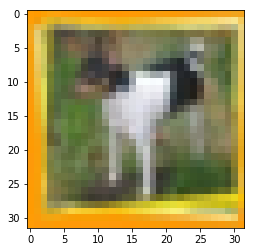

245
dog
automobile


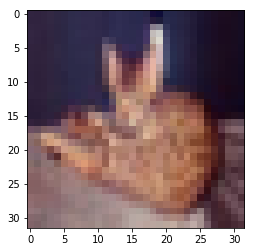

247
cat
ship


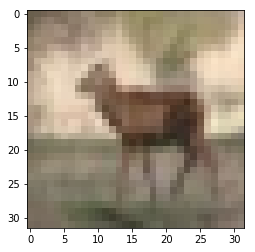

249
deer
bird


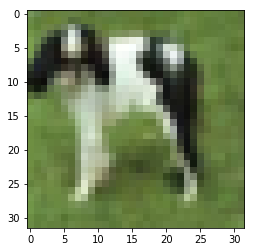

250
dog
horse


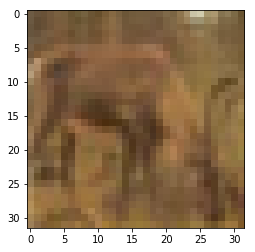

254
deer
horse


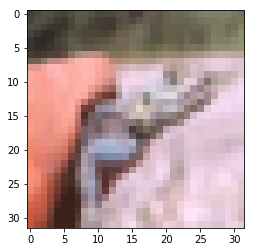

259
frog
dog


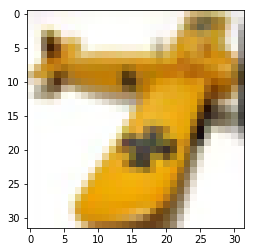

262
airplane
ship


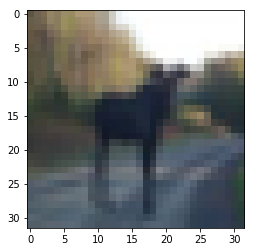

265
deer
airplane


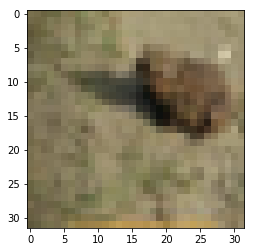

266
frog
airplane


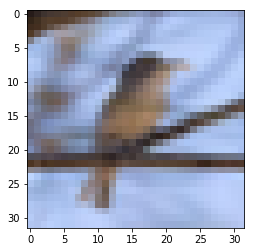

269
bird
airplane


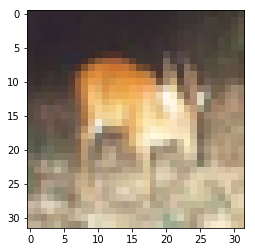

270
deer
horse


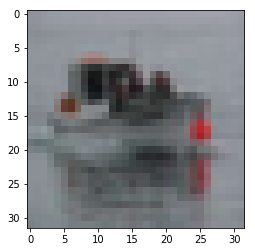

271
ship
airplane


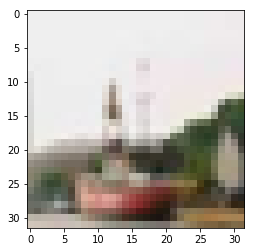

273
ship
truck


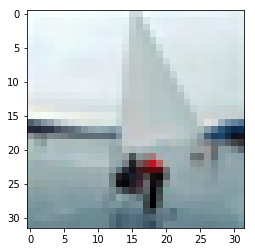

274
ship
airplane


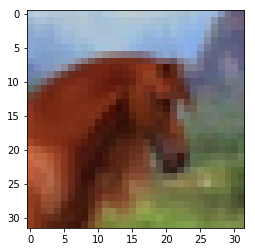

275
horse
truck


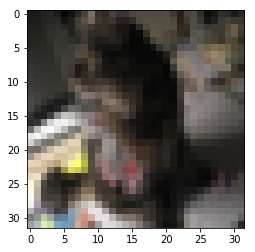

277
cat
truck


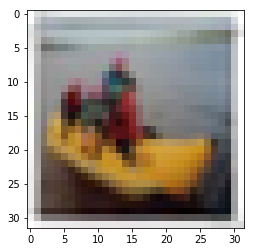

278
ship
automobile


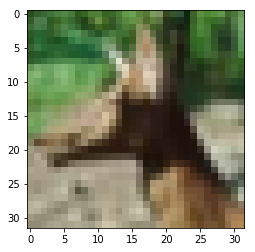

279
deer
horse


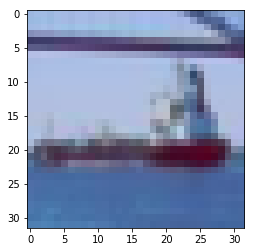

281
ship
airplane


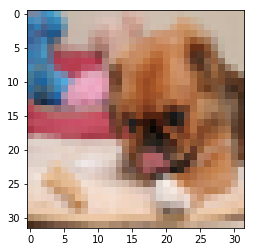

284
dog
truck


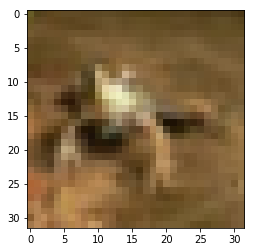

293
frog
airplane


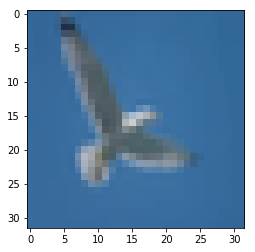

295
bird
airplane


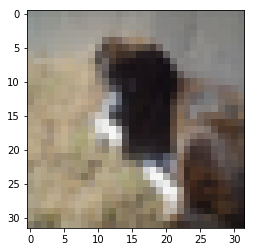

302
dog
horse


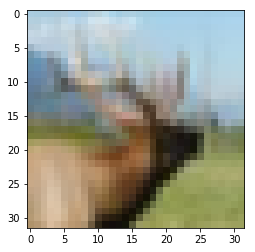

303
deer
truck


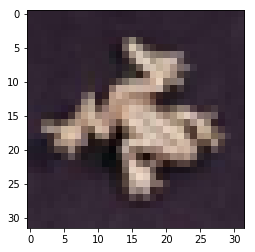

304
frog
horse


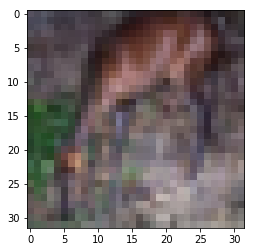

306
deer
horse


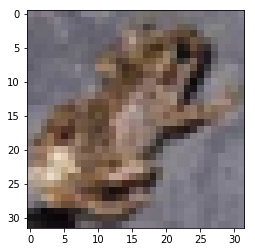

309
frog
ship


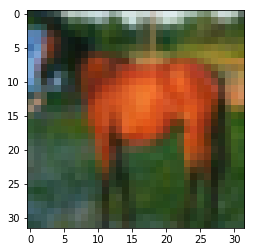

310
horse
automobile


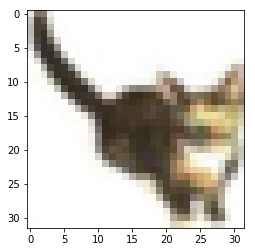

312
cat
airplane


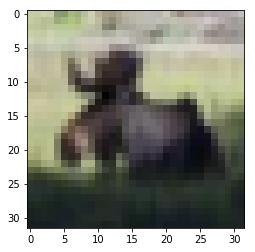

314
deer
truck


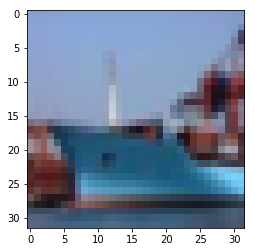

321
ship
airplane


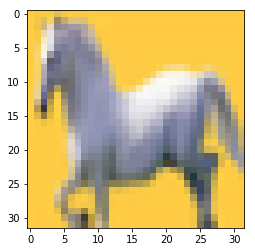

323
horse
airplane


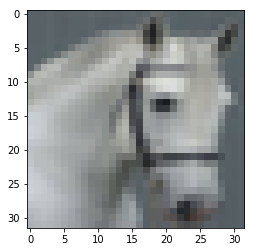

324
horse
truck


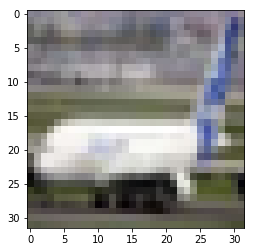

327
airplane
truck


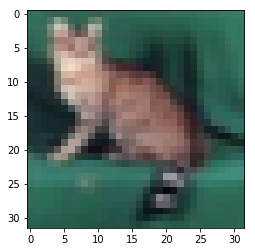

332
cat
bird


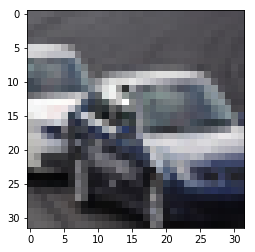

335
automobile
airplane


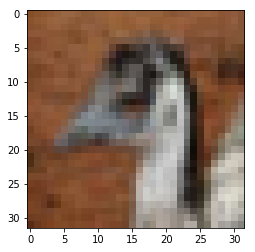

337
bird
dog


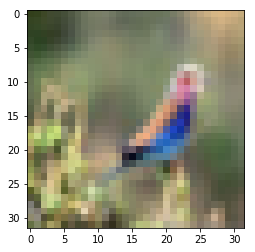

339
bird
horse


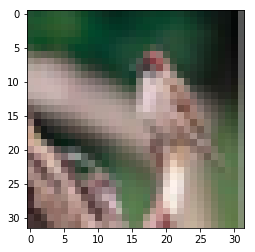

341
bird
ship


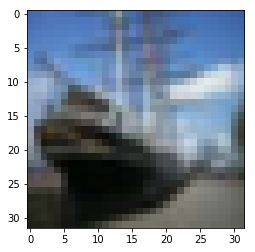

343
ship
airplane


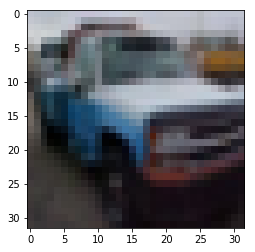

344
truck
automobile


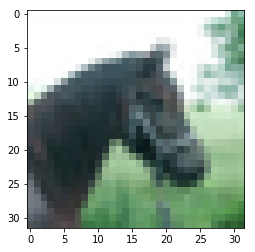

345
horse
truck


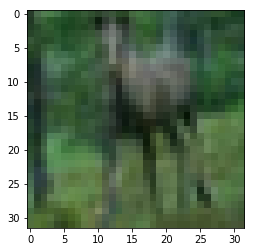

346
deer
horse


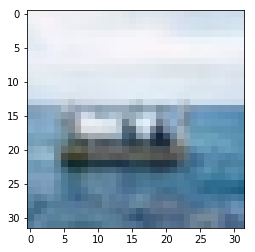

353
ship
airplane


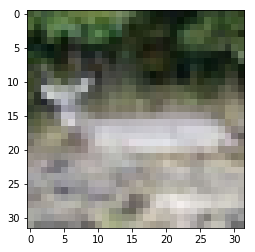

354
deer
ship


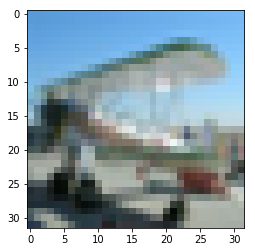

356
airplane
truck


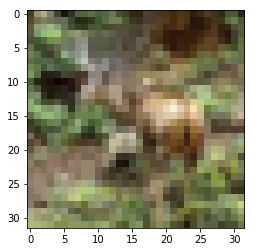

358
deer
horse


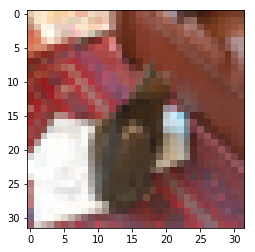

361
cat
horse


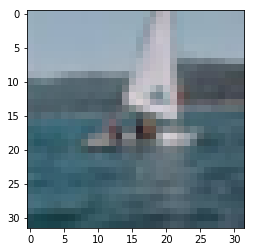

365
ship
airplane


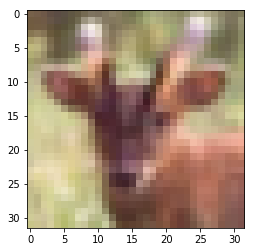

367
deer
cat


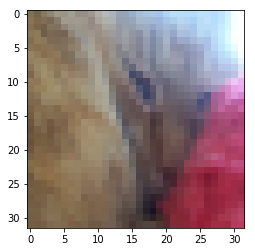

368
cat
horse


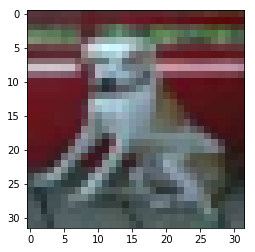

370
dog
airplane


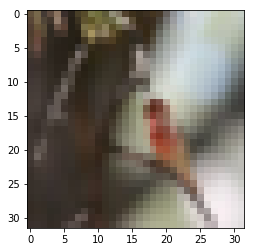

373
bird
cat


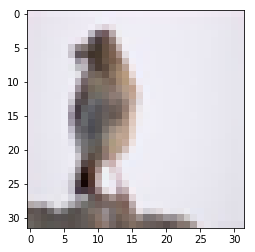

374
bird
horse


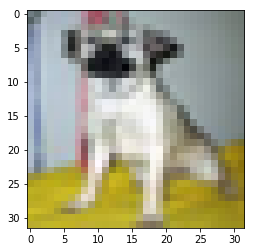

376
dog
horse


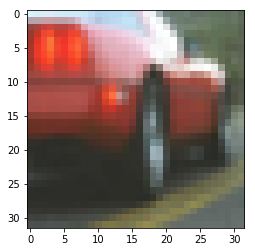

378
automobile
truck


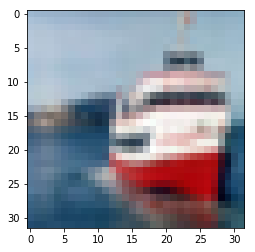

384
ship
automobile


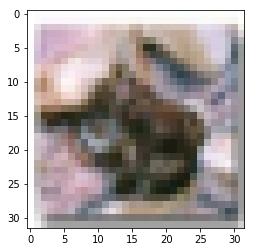

387
frog
truck


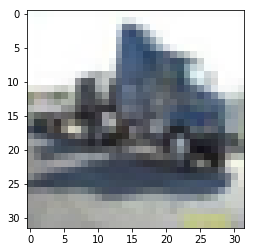

388
truck
airplane


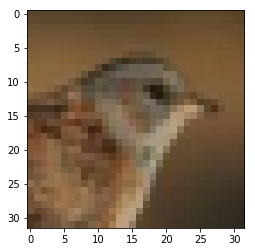

392
bird
dog


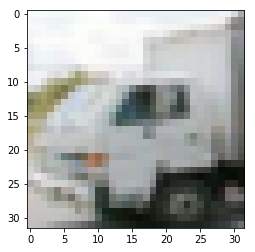

393
truck
automobile


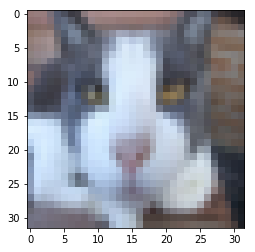

396
cat
airplane


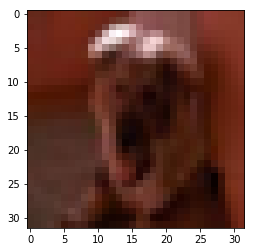

397
dog
truck


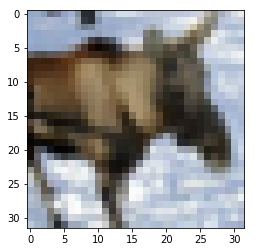

399
deer
horse


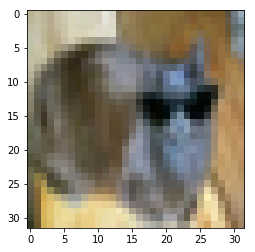

401
cat
dog


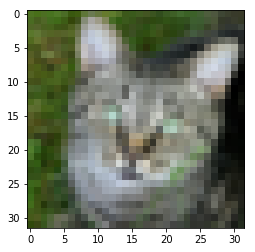

403
cat
ship


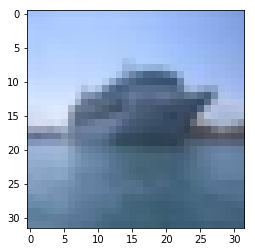

405
ship
airplane


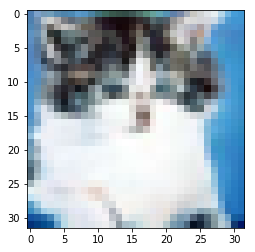

412
cat
ship


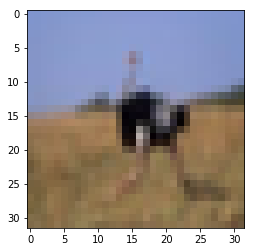

418
bird
horse


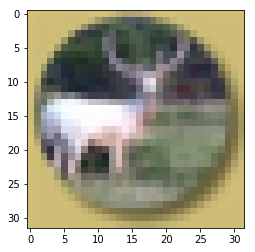

420
deer
truck


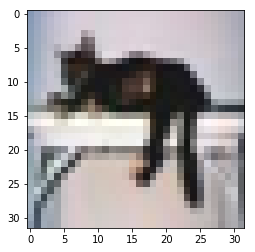

421
cat
airplane


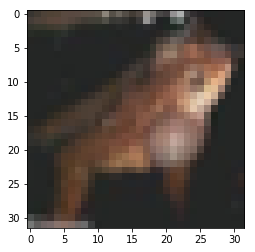

426
frog
ship


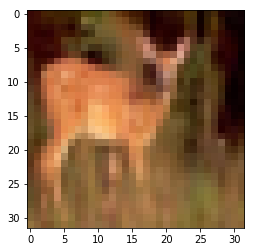

427
deer
horse


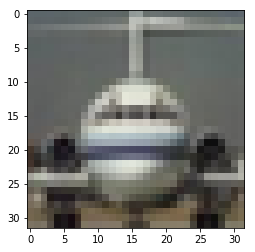

430
airplane
automobile


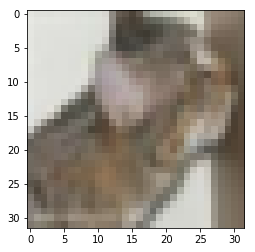

431
cat
horse


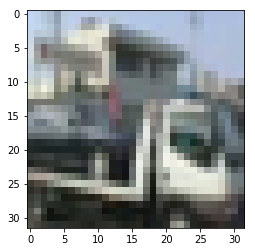

434
truck
automobile


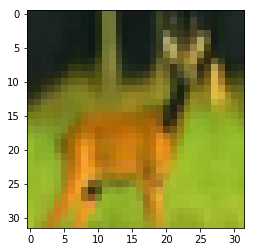

436
deer
automobile


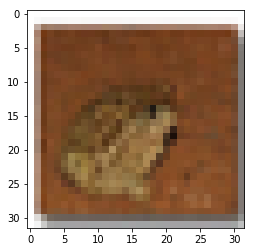

439
frog
ship


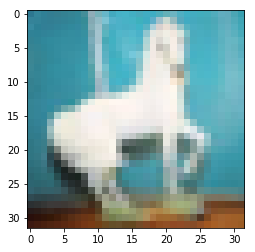

441
horse
automobile


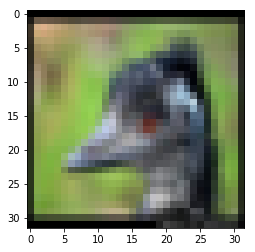

444
bird
automobile


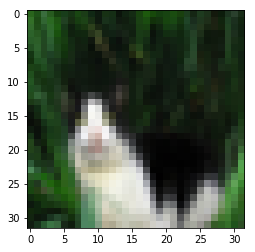

446
cat
horse


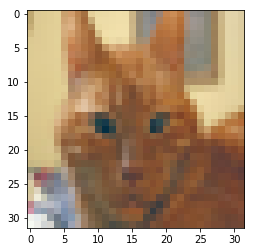

449
cat
automobile


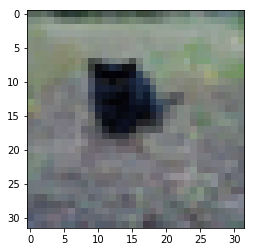

450
cat
airplane


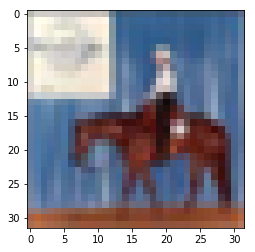

455
horse
truck


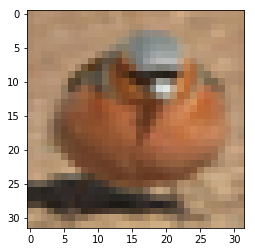

456
bird
automobile


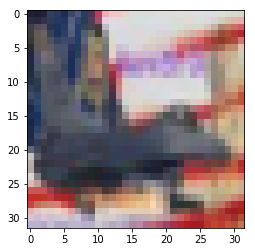

458
airplane
truck


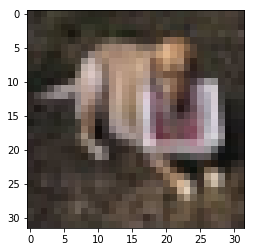

459
dog
horse


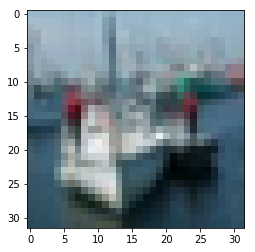

460
ship
truck


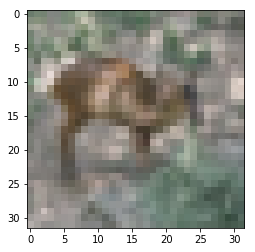

461
deer
horse


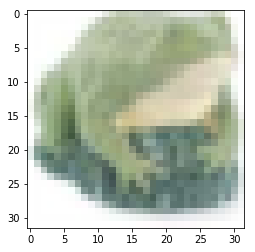

463
frog
airplane


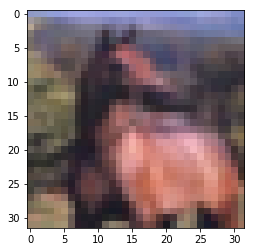

464
horse
truck


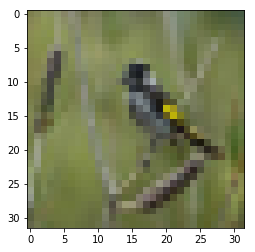

466
bird
frog


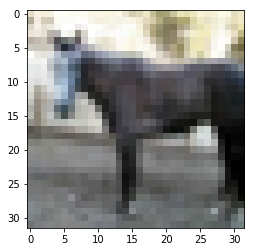

474
horse
airplane


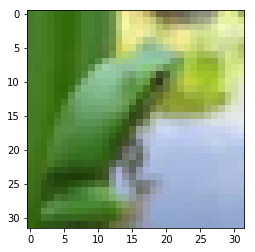

477
frog
bird


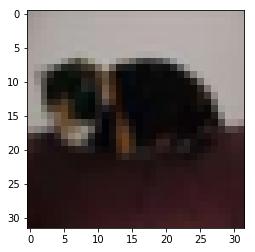

479
cat
airplane


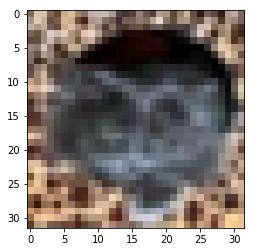

480
cat
automobile


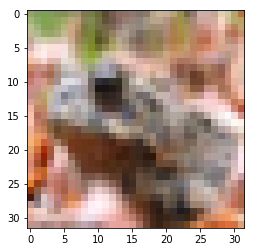

482
frog
cat


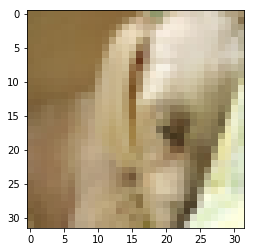

483
dog
horse


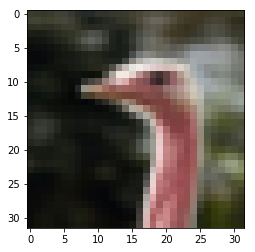

484
bird
automobile


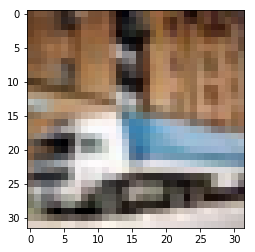

485
truck
automobile


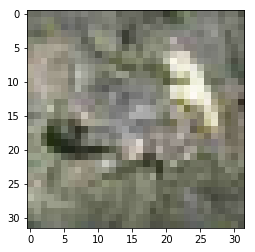

488
frog
ship


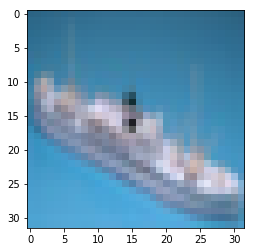

492
ship
airplane


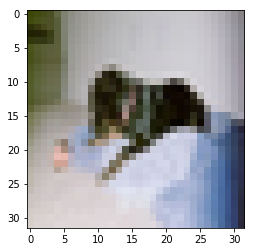

495
dog
cat


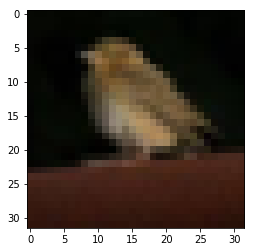

498
bird
horse


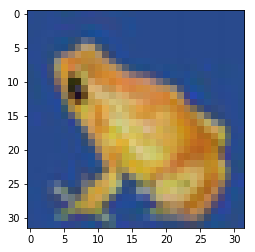

500
frog
airplane


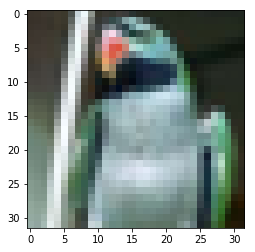

503
bird
automobile


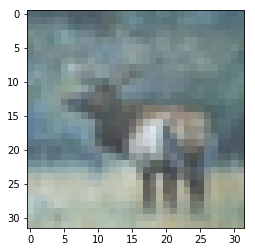

505
deer
airplane


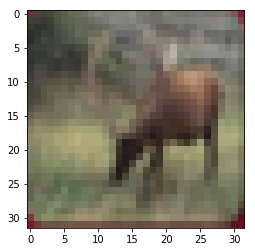

509
deer
horse


In [120]:
for i in wrongs[:200]:
    plt.imshow(test_pics[wrongs[i]])
    plt.show()
    print(i)
    label_to_text(test_labels[wrongs[i]])
    label_to_text(results_test[wrongs[i]])

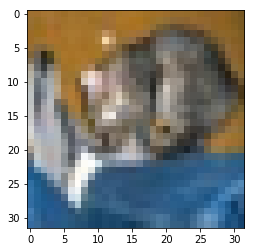

0
cat
cat


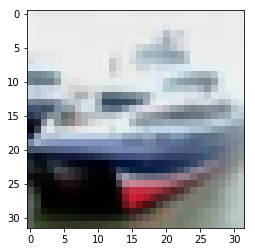

1
ship
ship


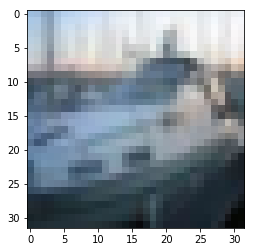

2
ship
automobile


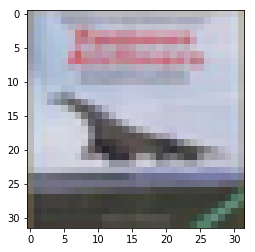

3
airplane
airplane


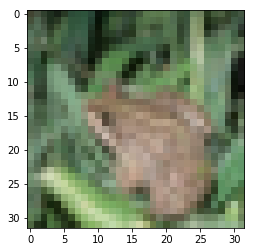

4
frog
frog


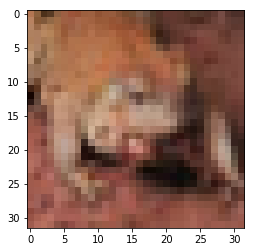

5
frog
truck


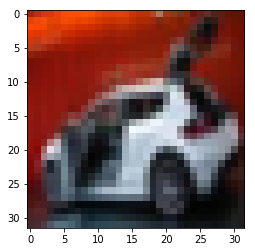

6
automobile
automobile


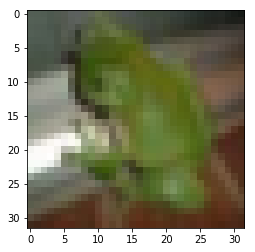

7
frog
frog


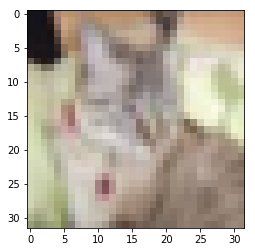

8
cat
cat


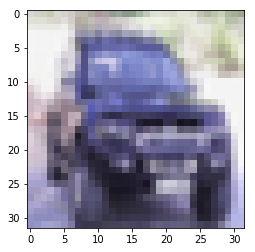

9
automobile
automobile


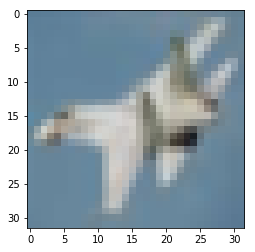

10
airplane
airplane


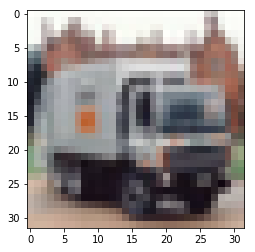

11
truck
truck


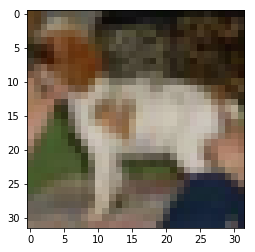

12
dog
dog


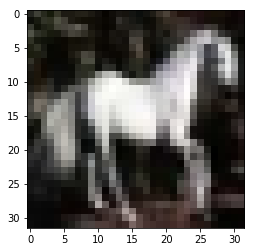

13
horse
horse


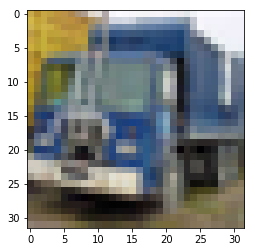

14
truck
truck


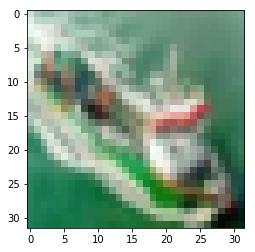

15
ship
ship


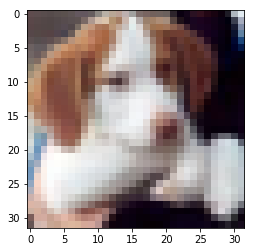

16
dog
dog


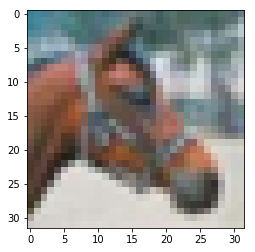

17
horse
horse


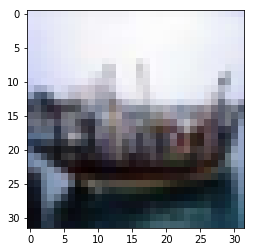

18
ship
ship


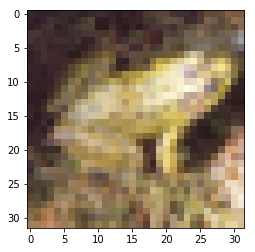

19
frog
frog


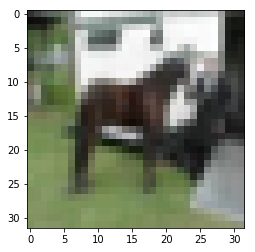

20
horse
horse


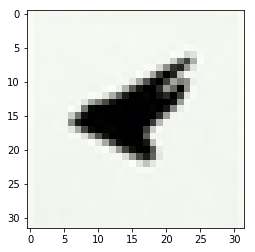

21
airplane
airplane


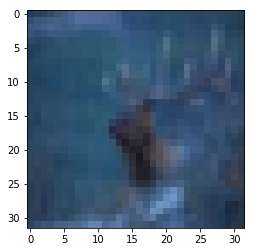

22
deer
airplane


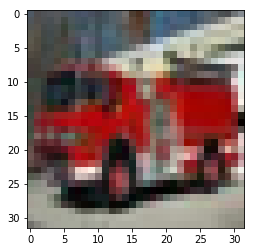

23
truck
truck


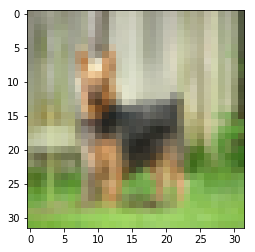

24
dog
airplane


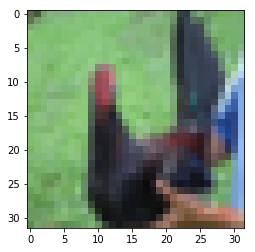

25
bird
airplane


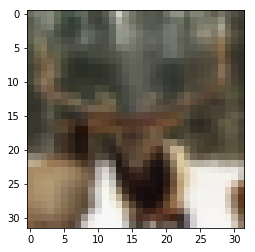

26
deer
airplane


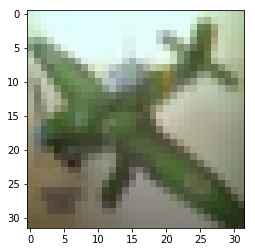

27
airplane
airplane


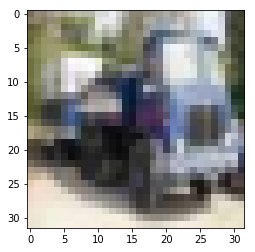

28
truck
truck


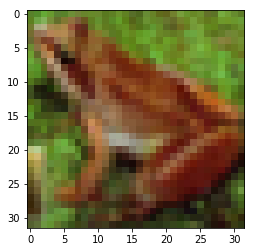

29
frog
automobile


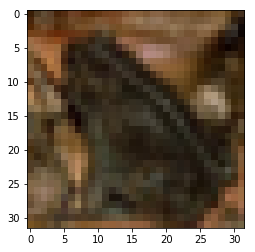

30
frog
frog


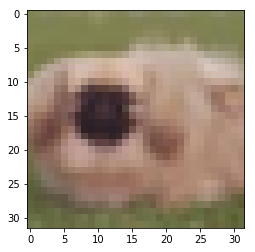

31
dog
dog


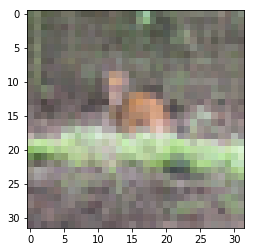

32
deer
ship


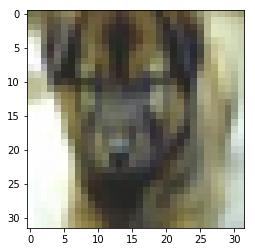

33
dog
dog


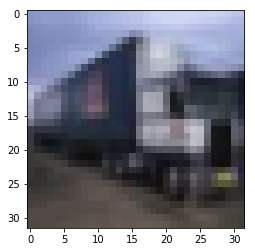

34
truck
truck


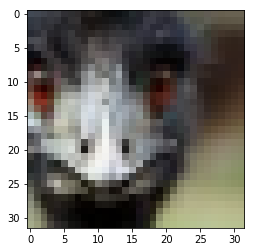

35
bird
ship


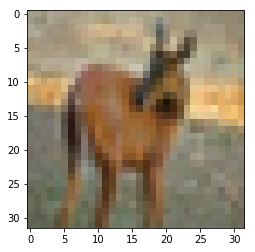

36
deer
horse


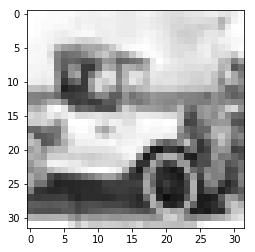

37
automobile
truck


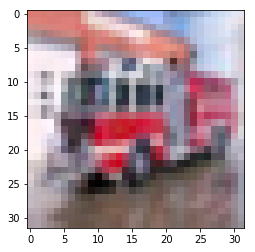

38
truck
truck


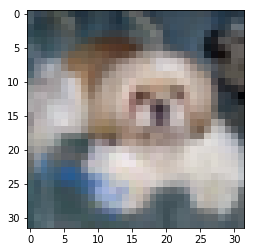

39
dog
dog


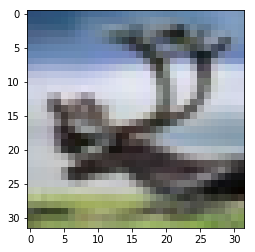

40
deer
airplane


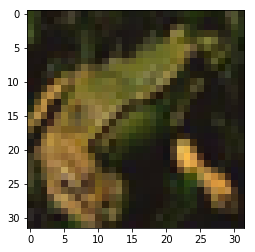

41
frog
frog


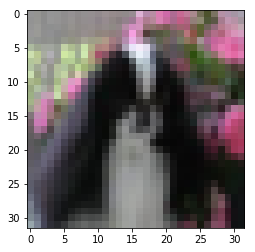

42
dog
horse


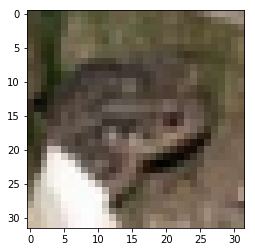

43
frog
frog


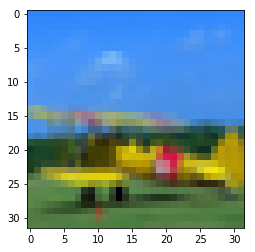

44
airplane
airplane


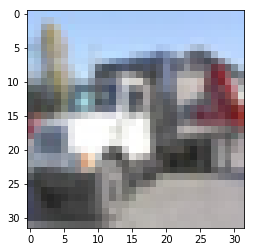

45
truck
truck


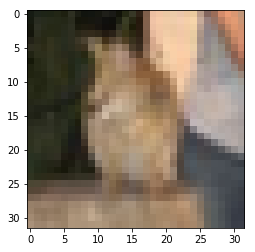

46
cat
cat


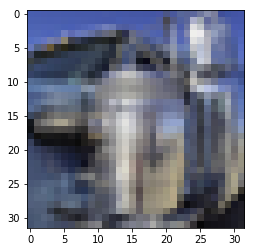

47
truck
truck


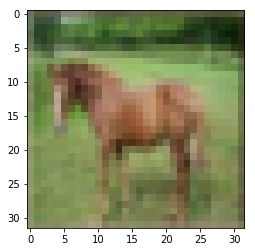

48
horse
horse


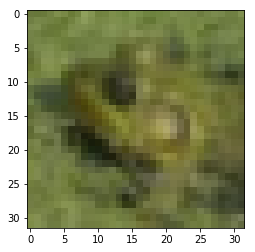

49
frog
frog


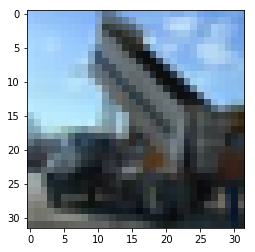

50
truck
truck


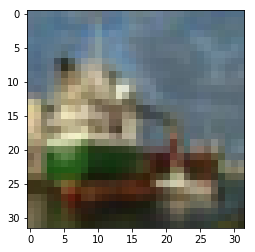

51
ship
ship


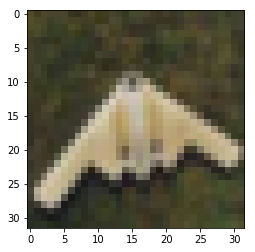

52
airplane
horse


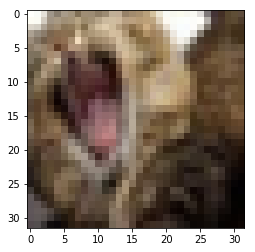

53
cat
truck


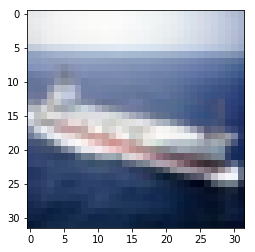

54
ship
ship


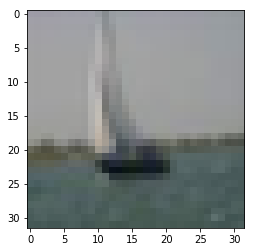

55
ship
ship


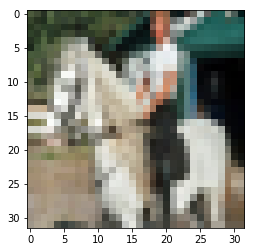

56
horse
horse


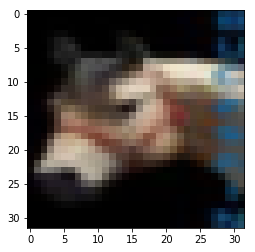

57
horse
ship


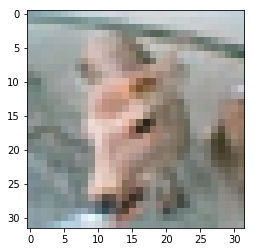

58
deer
cat


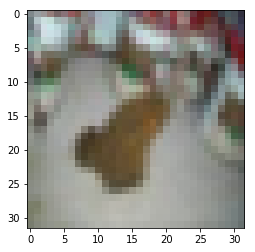

59
frog
horse


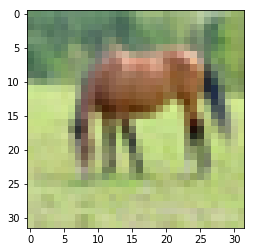

60
horse
horse


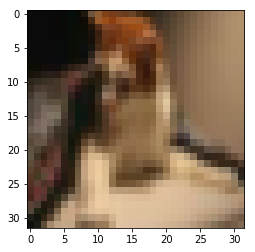

61
cat
dog


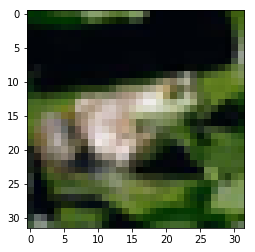

62
frog
automobile


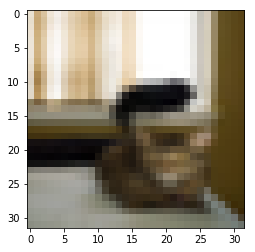

63
cat
airplane


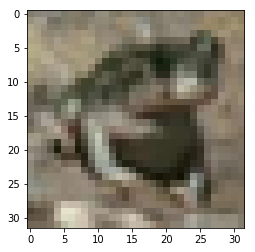

64
frog
frog


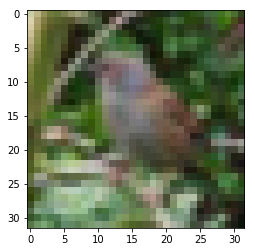

65
bird
bird


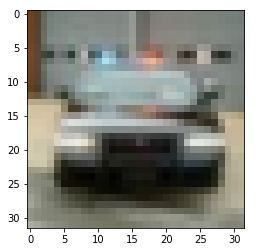

66
automobile
automobile


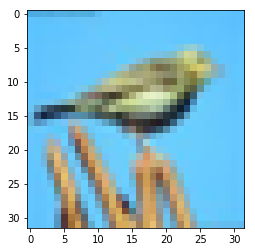

67
bird
airplane


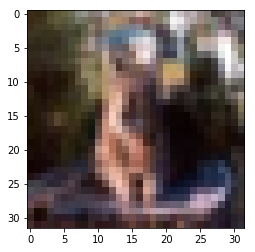

68
cat
cat


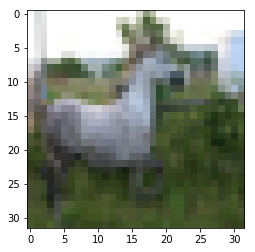

69
horse
horse


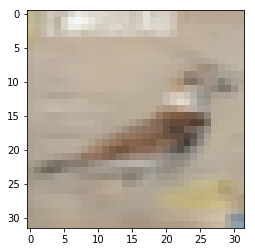

70
bird
airplane


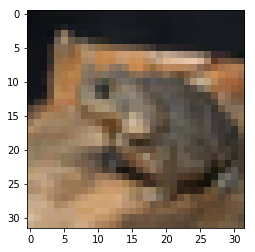

71
frog
truck


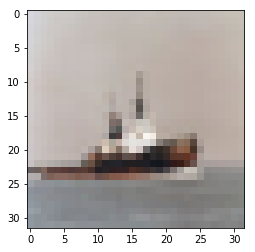

72
ship
ship


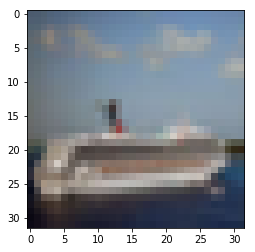

73
ship
ship


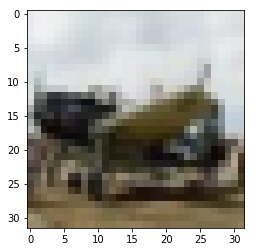

74
airplane
truck


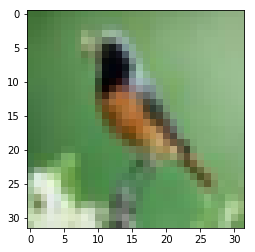

75
bird
bird


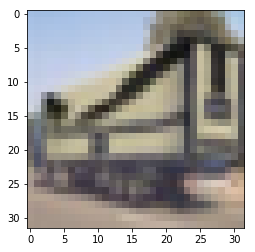

76
truck
airplane


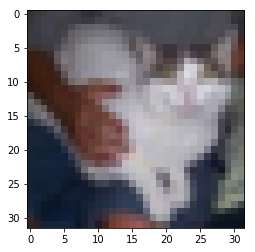

77
cat
cat


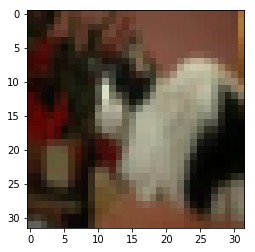

78
cat
horse


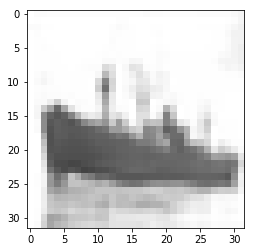

79
ship
ship


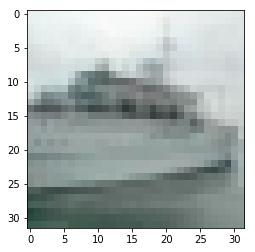

80
ship
ship


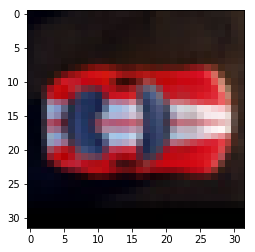

81
automobile
automobile


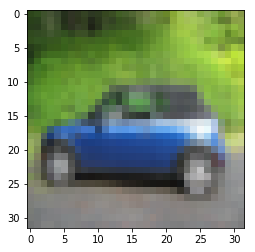

82
automobile
automobile


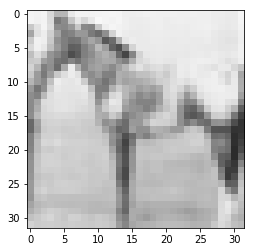

83
horse
horse


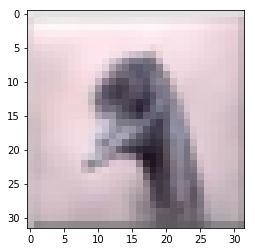

84
bird
bird


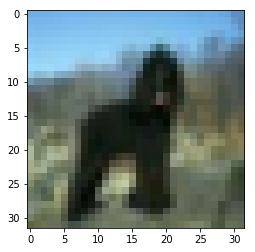

85
dog
truck


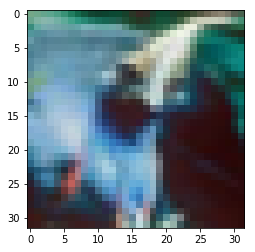

86
bird
bird


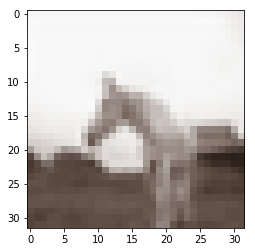

87
horse
horse


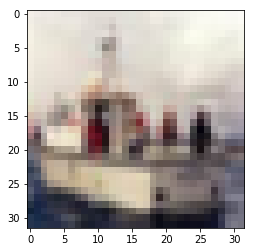

88
ship
truck


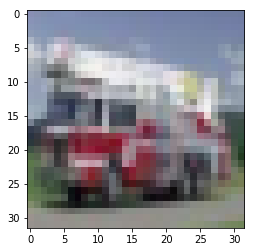

89
truck
truck


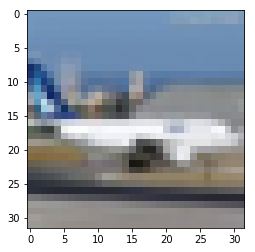

90
airplane
airplane


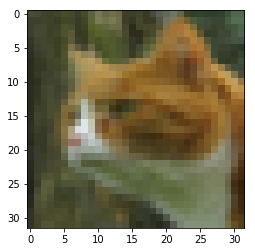

91
cat
automobile


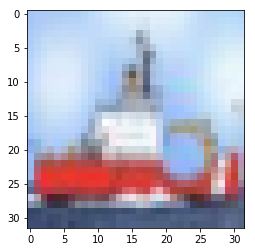

92
ship
automobile


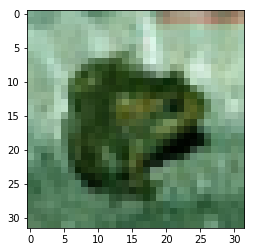

93
frog
frog


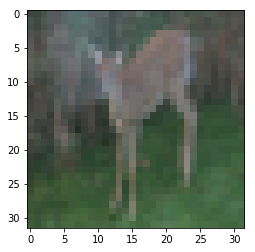

94
deer
horse


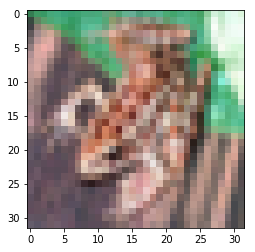

95
frog
frog


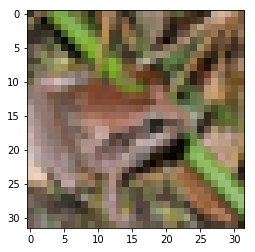

96
frog
bird


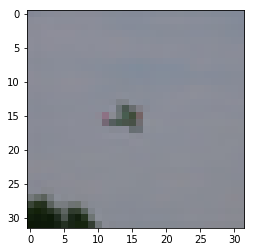

97
airplane
airplane


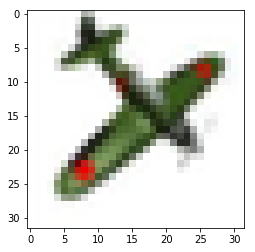

98
airplane
airplane


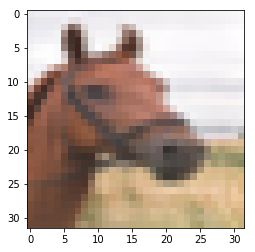

99
horse
horse


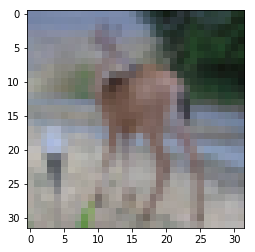

100
deer
horse


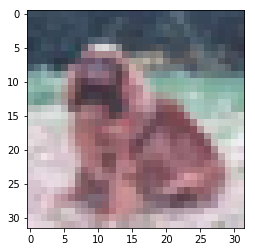

101
dog
dog


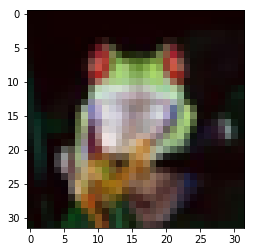

102
frog
horse


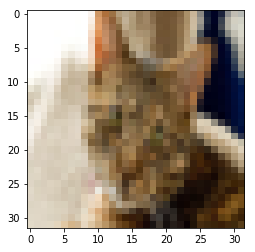

103
cat
truck


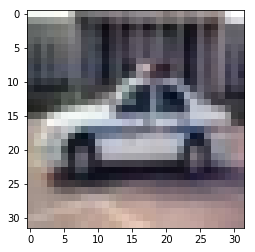

104
automobile
automobile


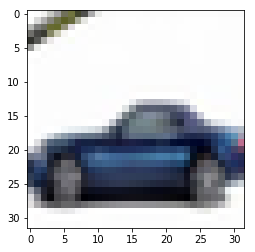

105
automobile
automobile


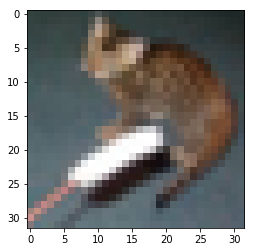

106
cat
ship


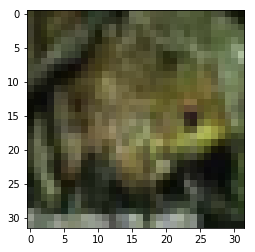

107
frog
frog


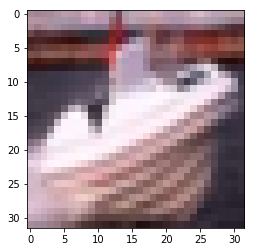

108
ship
ship


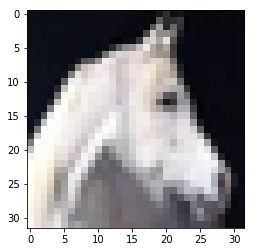

109
horse
horse


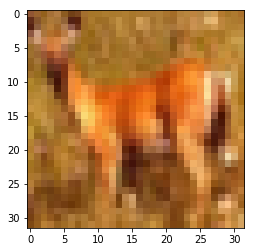

110
deer
airplane


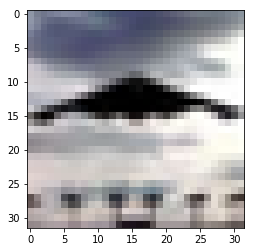

111
airplane
airplane


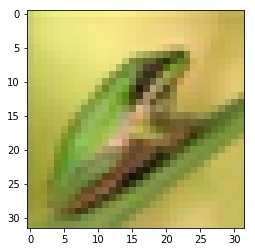

112
frog
frog


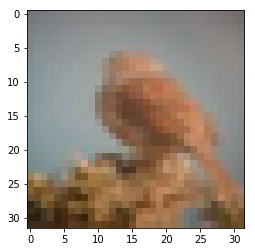

113
bird
bird


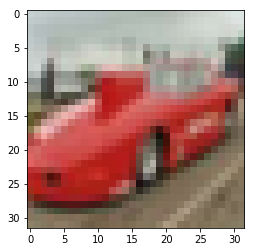

114
automobile
automobile


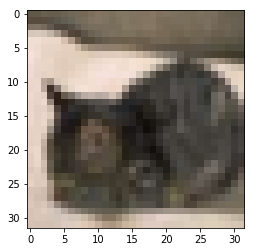

115
cat
cat


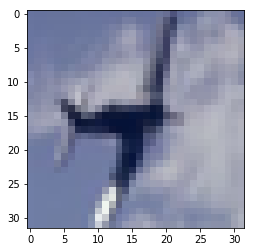

116
airplane
airplane


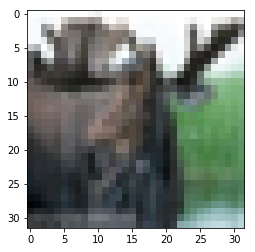

117
deer
horse


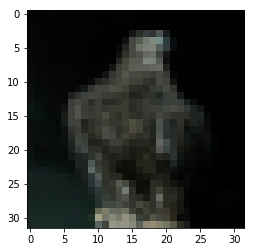

118
bird
horse


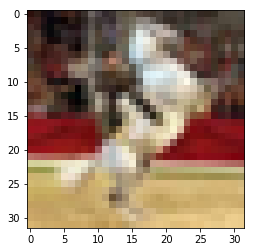

119
horse
horse


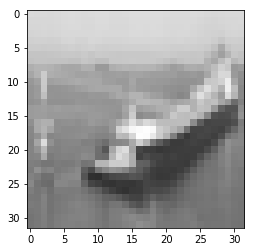

120
ship
airplane


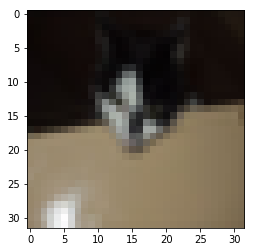

121
cat
horse


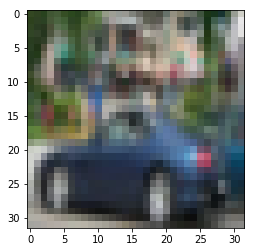

122
automobile
automobile


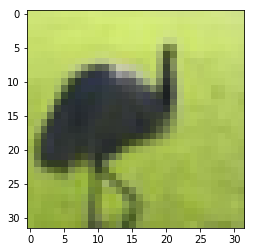

123
bird
airplane


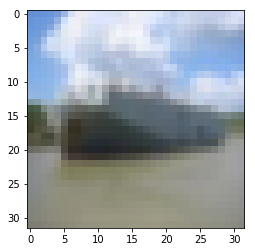

124
ship
airplane


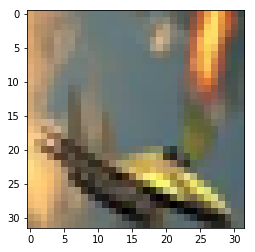

125
airplane
airplane


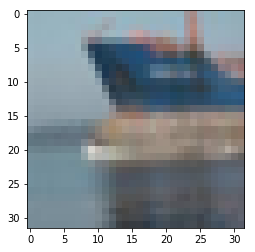

126
ship
airplane


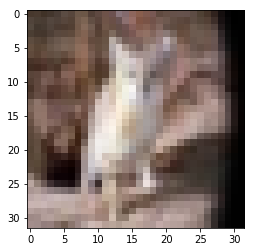

127
cat
cat


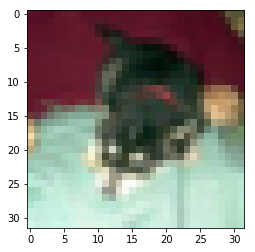

128
dog
airplane


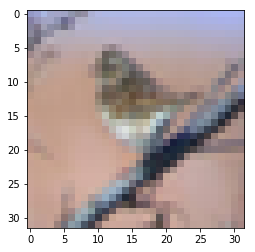

129
bird
ship


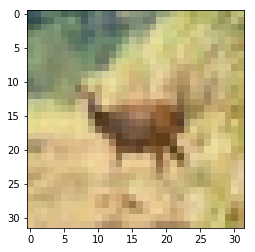

130
deer
bird


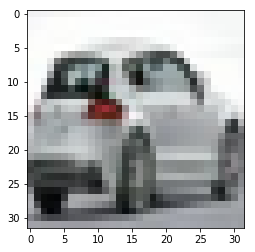

131
automobile
automobile


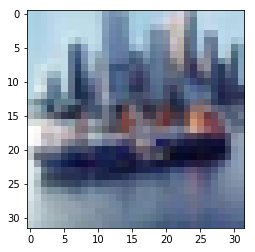

132
ship
airplane


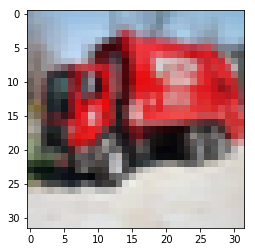

133
truck
truck


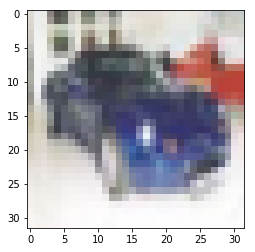

134
automobile
automobile


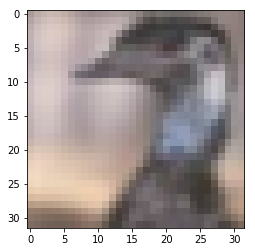

135
bird
horse


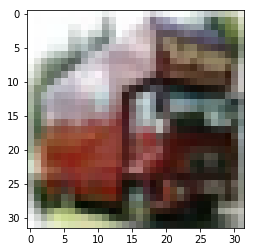

136
truck
truck


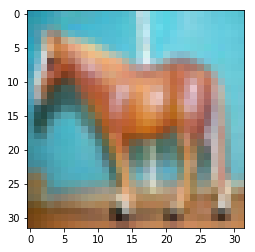

137
horse
horse


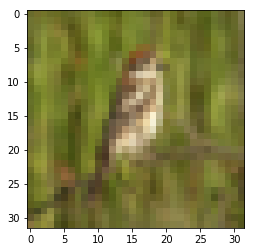

138
bird
bird


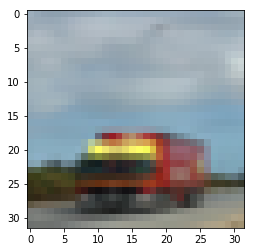

139
truck
automobile


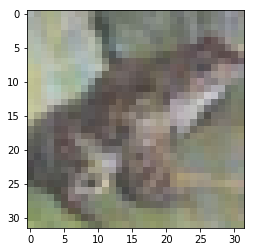

140
frog
airplane


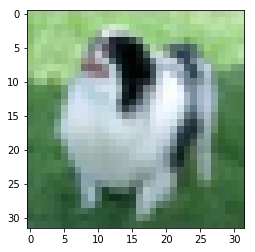

141
dog
dog


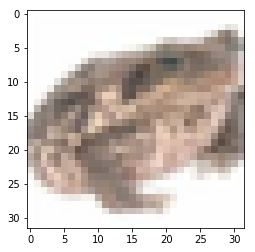

142
frog
frog


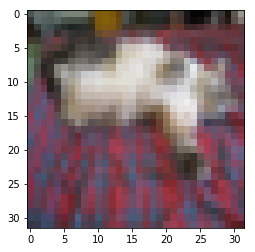

143
cat
dog


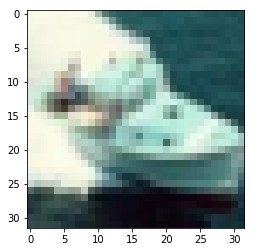

144
ship
truck


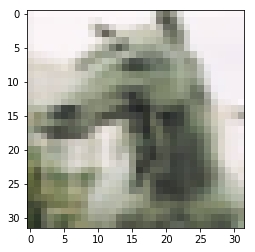

145
horse
truck


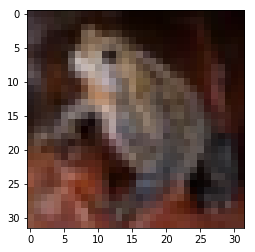

146
frog
frog


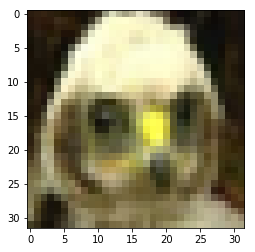

147
bird
automobile


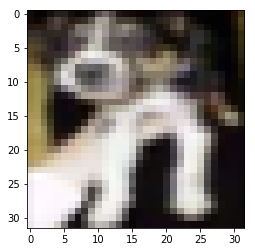

148
dog
dog


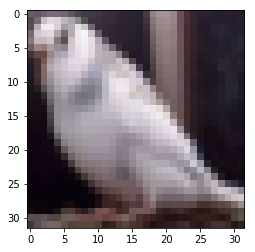

149
bird
bird


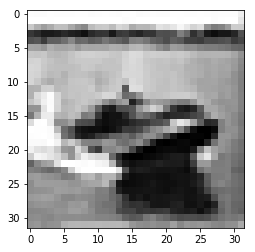

150
ship
airplane


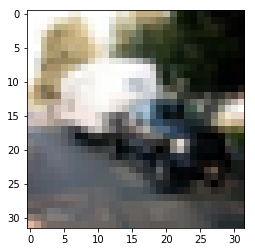

151
truck
truck


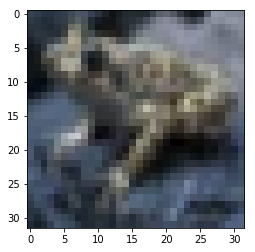

152
frog
truck


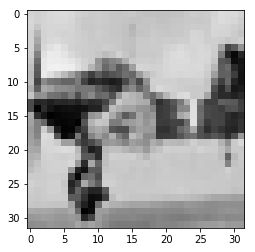

153
airplane
airplane


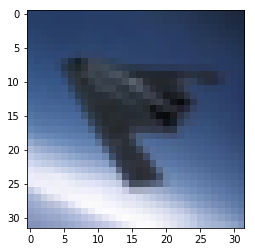

154
airplane
airplane


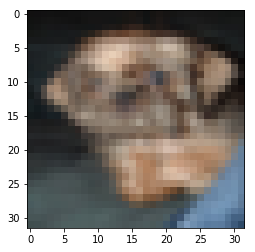

155
dog
dog


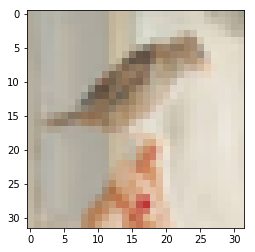

156
bird
bird


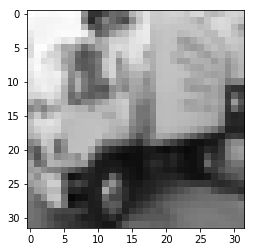

157
truck
truck


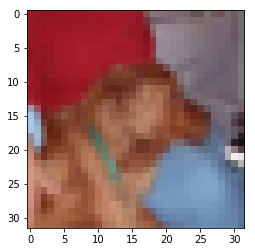

158
dog
cat


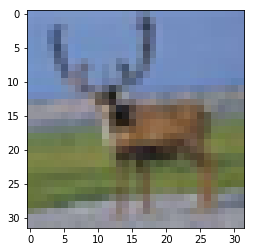

159
deer
airplane


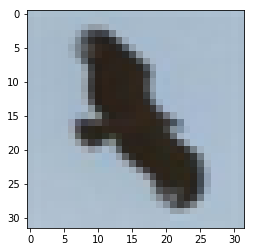

160
bird
airplane


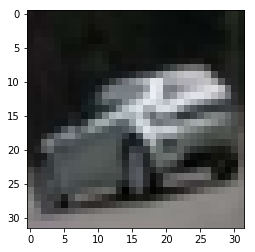

161
automobile
automobile


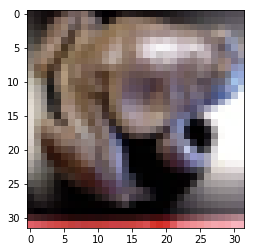

162
frog
automobile


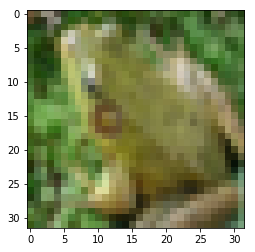

163
frog
frog


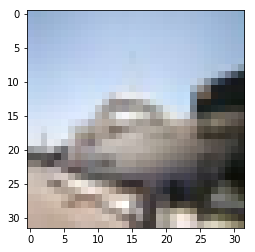

164
ship
automobile


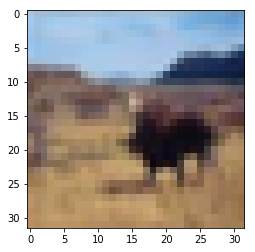

165
deer
horse


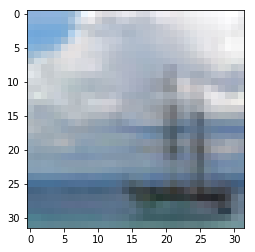

166
ship
airplane


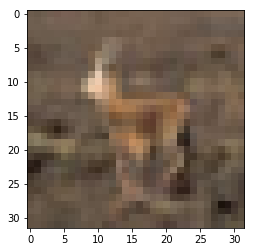

167
deer
airplane


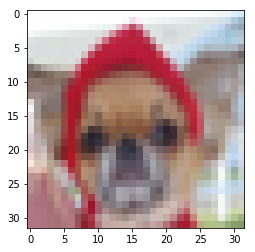

168
dog
truck


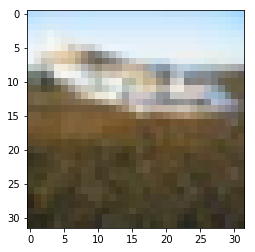

169
airplane
airplane


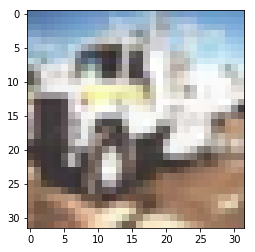

170
truck
truck


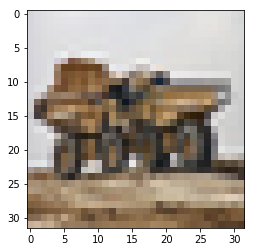

171
truck
truck


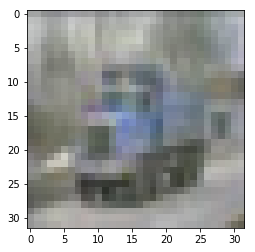

172
truck
truck


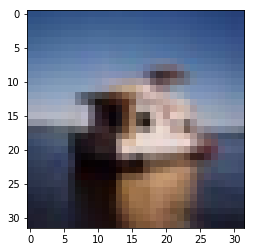

173
ship
ship


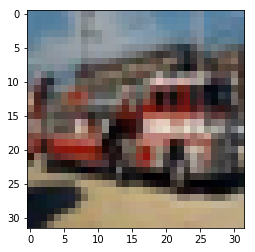

174
truck
truck


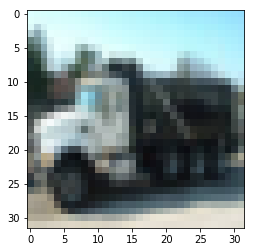

175
truck
truck


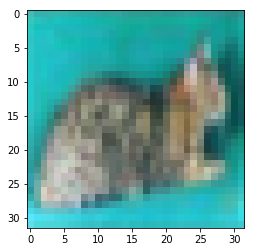

176
cat
airplane


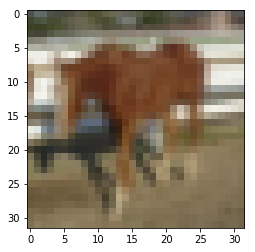

177
horse
airplane


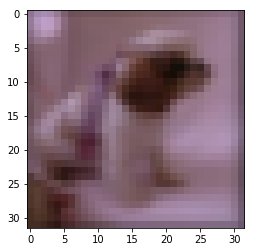

178
dog
dog


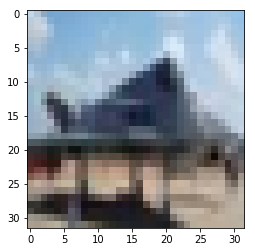

179
airplane
truck


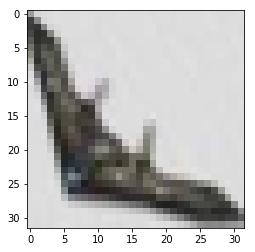

180
airplane
airplane


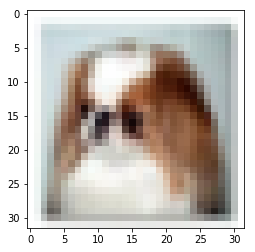

181
dog
dog


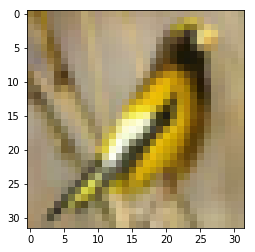

182
bird
bird


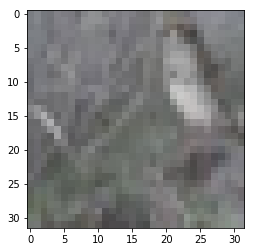

183
bird
ship


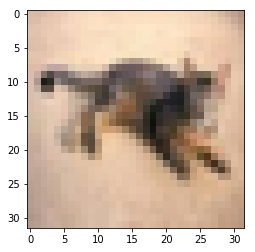

184
cat
airplane


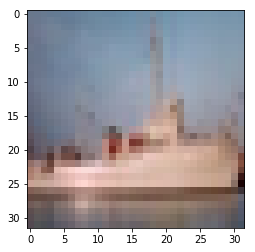

185
ship
ship


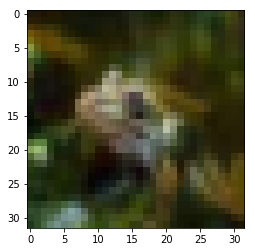

186
frog
airplane


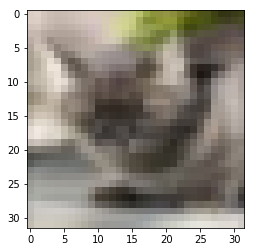

187
cat
airplane


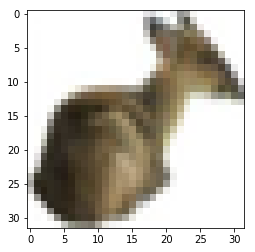

188
deer
cat


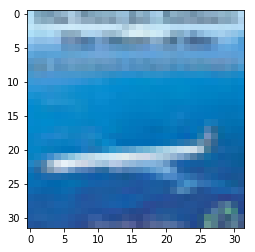

189
airplane
airplane


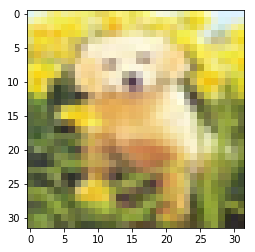

190
dog
truck


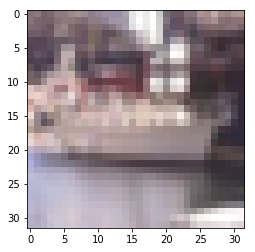

191
ship
ship


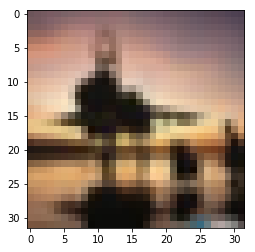

192
airplane
airplane


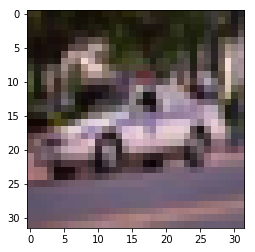

193
automobile
automobile


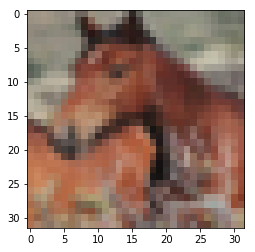

194
horse
horse


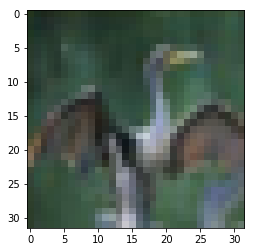

195
bird
airplane


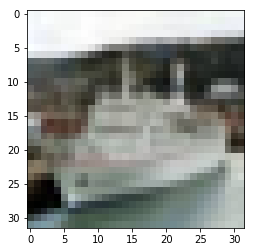

196
ship
ship


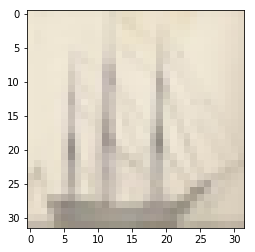

197
ship
ship


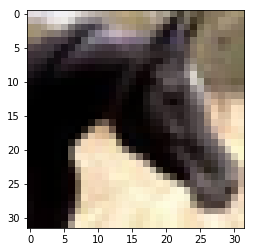

198
horse
horse


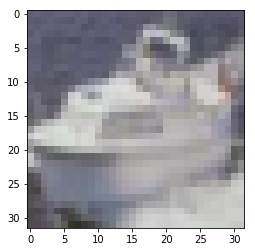

199
ship
ship


In [116]:
for i in range(200):
    plt.imshow(test_pics[i])
    plt.show()
    print(i)
    label_to_text(test_labels[i])
    label_to_text(results_test[i])